In [1]:
!pip install tqdm

     |████████████████████████████████| 76 kB 4.4 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pydot
!pip install graphviz

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.


In [3]:
import json
from tqdm import tqdm
import collections
import random
import numpy as np

In [4]:
annotation_file='./annotations/captions_train2014.json'
with open(annotation_file, 'r') as f:
    annotations = json.load(f)

In [5]:
annotations

{'info': {'description': 'COCO 2014 Dataset',
  'url': 'http://cocodataset.org',
  'version': '1.0',
  'year': 2014,
  'contributor': 'COCO Consortium',
  'date_created': '2017/09/01'},
 'images': [{'license': 5,
   'file_name': 'COCO_train2014_000000057870.jpg',
   'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg',
   'height': 480,
   'width': 640,
   'date_captured': '2013-11-14 16:28:13',
   'flickr_url': 'http://farm4.staticflickr.com/3153/2970773875_164f0c0b83_z.jpg',
   'id': 57870},
  {'license': 5,
   'file_name': 'COCO_train2014_000000384029.jpg',
   'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000384029.jpg',
   'height': 429,
   'width': 640,
   'date_captured': '2013-11-14 16:29:45',
   'flickr_url': 'http://farm3.staticflickr.com/2422/3577229611_3a3235458a_z.jpg',
   'id': 384029},
  {'license': 1,
   'file_name': 'COCO_train2014_000000222016.jpg',
   'coco_url': 'http://images.cocodataset.org/train2014/COCO_tr

In [6]:
import os
lt=os.listdir('train2014npy')
len(lt),lt[0]

(82783, 'COCO_train2014_000000297632.jpg.npy')

In [7]:
# Group all captions together having the same image ID.
PATH='train2014npy/'
image_path_to_caption = collections.defaultdict(list)
for val in tqdm(annotations['annotations']):
  caption = f"<start> {val['caption']} <end>"
  image_path = PATH + 'COCO_train2014_' + '%012d.jpg.npy' % (val['image_id'])
  image_path_to_caption[image_path].append(caption)

100%|██████████| 414113/414113 [00:00<00:00, 575626.97it/s]


In [8]:
image_path_to_caption

defaultdict(list,
            {'train2014npy/COCO_train2014_000000318556.jpg.npy': ['<start> A very clean and well decorated empty bathroom <end>',
              '<start> A blue and white bathroom with butterfly themed wall tiles. <end>',
              '<start> A bathroom with a border of butterflies and blue paint on the walls above it. <end>',
              '<start> An angled view of a beautifully decorated bathroom. <end>',
              '<start> A clock that blends in with the wall hangs in a bathroom.  <end>'],
             'train2014npy/COCO_train2014_000000116100.jpg.npy': ['<start> A panoramic view of a kitchen and all of its appliances. <end>',
              '<start> A panoramic photo of a kitchen and dining room <end>',
              '<start> A wide angle view of the kitchen work area <end>',
              '<start> multiple photos of a brown and white kitchen.  <end>',
              '<start> A kitchen that has a checkered patterned floor and white cabinets. <end>'],
         

In [9]:
# train_image_paths = list(image_path_to_caption.keys())
# random.shuffle(train_image_paths)

# # Select the first 6000 image_paths from the shuffled set.
# # Approximately each image id has 5 captions associated with it, so that will
# # lead to 30,000 examples.
# # train_image_paths = image_paths[:45000]
# print(len(train_image_paths))

82783


In [19]:
# # print(train_image_paths[:5])
# new_paths=[path+'\n' for path in train_image_paths]
# with open('train_image_paths.txt','w') as f:
#     f.writelines(new_paths)

In [7]:
# with open('train_image_paths.txt','r') as f:
#     train_image_paths=f.readlines()
# len(train_image_paths),train_image_paths[0][:-1]

(45000, 'train2014/COCO_train2014_000000128250.jpg')

In [8]:
# train_image_paths=[path[:-1] for path in train_image_paths]
# train_image_paths[0],len(train_image_paths)

('train2014/COCO_train2014_000000128250.jpg', 45000)

In [9]:
train_image_paths = list(image_path_to_caption.keys())
train_captions = []#list of all captions
img_name_vector = []#list of all paths

for image_path in tqdm(train_image_paths):
  caption_list = image_path_to_caption[image_path]
  for i in range(min(3,len(caption_list))):
        train_captions.append(caption_list[i])
        img_name_vector.append(image_path)

100%|██████████| 82783/82783 [00:00<00:00, 408546.42it/s]


In [10]:
len(train_captions),len(img_name_vector)

(248349, 248349)

In [9]:
image=np.load(open(img_name_vector[0],'rb'))
img_name_vector[0],train_captions[0],image.shape

('train2014npy/COCO_train2014_000000318556.jpg.npy',
 '<start> A very clean and well decorated empty bathroom <end>',
 (1, 2048))

In [ ]:
from PIL import Image
print(train_captions[10])
Image.open(img_name_vector[10])

# Preprocess the image using InceptionV3

In [11]:
import tensorflow as tf

In [16]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [17]:
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

87916544/87910968 [==============================] - 2s 0us/step


In [18]:
# Get unique images
encode_train = sorted(set(img_name_vector))

# Feel free to change batch_size according to your system configuration
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)


In [20]:
3674*16

58784

In [19]:
for img, path in tqdm(image_dataset):
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    #print(path_of_feature)
    np.save(path_of_feature, bf.numpy())

3674it [15:03,  4.07it/s]


OSError: 131072 requested and 34784 written

In [150]:
1322*16#5174

21152

# Text Preprocessing and Tokenization

In [12]:
# Find the maximum length of any caption in the dataset
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

In [42]:
# Choose the top 5000 words from the vocabulary
top_k = 10000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(train_captions)

In [43]:
len(tokenizer.word_index),tokenizer.word_index

(19422,
 {'<unk>': 1,
  'a': 2,
  '<start>': 3,
  '<end>': 4,
  'on': 5,
  'of': 6,
  'the': 7,
  'in': 8,
  'with': 9,
  'and': 10,
  'is': 11,
  'man': 12,
  'to': 13,
  'sitting': 14,
  'an': 15,
  'two': 16,
  'standing': 17,
  'people': 18,
  'at': 19,
  'next': 20,
  'are': 21,
  'white': 22,
  'woman': 23,
  'table': 24,
  'street': 25,
  'holding': 26,
  'that': 27,
  'large': 28,
  'top': 29,
  'person': 30,
  'some': 31,
  'down': 32,
  'it': 33,
  'group': 34,
  'field': 35,
  'up': 36,
  'small': 37,
  'tennis': 38,
  'near': 39,
  'front': 40,
  'riding': 41,
  'black': 42,
  'his': 43,
  'plate': 44,
  'room': 45,
  'train': 46,
  'dog': 47,
  'young': 48,
  'red': 49,
  'by': 50,
  'cat': 51,
  'baseball': 52,
  'water': 53,
  'walking': 54,
  'while': 55,
  'playing': 56,
  'has': 57,
  'bathroom': 58,
  'sign': 59,
  'blue': 60,
  'food': 61,
  'kitchen': 62,
  'grass': 63,
  'green': 64,
  'bus': 65,
  'parked': 66,
  'side': 67,
  'pizza': 68,
  'there': 69,
  'other

In [44]:
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [48]:
import pickle
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [13]:
import pickle

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [14]:
# Create the tokenized vectors
train_seqs = tokenizer.texts_to_sequences(train_captions)

In [15]:
# Pad each vector to the max_length of the captions
# If you do not provide a max_length value, pad_sequences calculates it automatically
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

In [21]:
# import pickle

# # saving
# with open('tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [16]:
# Calculates the max_length, which is used to store the attention weights
max_length = calc_max_length(train_seqs)
max_length

52

# Split data into train and test

In [17]:
img_to_cap_vector = collections.defaultdict(list)
for img, cap in zip(img_name_vector, cap_vector):
  img_to_cap_vector[img].append(cap)

# Create training and validation sets using an 80-20 split randomly.
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.75)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
  capt_len = len(img_to_cap_vector[imgt])
  img_name_train.extend([imgt] * capt_len)
  cap_train.extend(img_to_cap_vector[imgt])

img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
  capv_len = len(img_to_cap_vector[imgv])
  img_name_val.extend([imgv] * capv_len)
  cap_val.extend(img_to_cap_vector[imgv])

In [18]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(186261, 186261, 62088, 62088)

In [19]:
cap_train[0].shape

(52,)

In [20]:
# Feel free to change these parameters according to your system's configuration
top_k=10000
BATCH_SIZE = 16
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = top_k + 1
num_steps = len(img_name_train) // BATCH_SIZE
# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 2048
attention_features_shape = 64

In [21]:
vocab_size

10001

In [22]:
# Load the numpy files
def map_func(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8'))
  return img_tensor, cap

In [23]:
img_name_train[0],cap_train[0]

('train2014npy/COCO_train2014_000000515717.jpg.npy',
 array([  3,  79,  28, 313,  21, 374,  32,   5,   2,  73,   4,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       dtype=int32))

In [24]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Model

In [25]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

    # hidden shape == (batch_size, hidden_size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
    hidden_with_time_axis = tf.expand_dims(hidden, 1)

    # attention_hidden_layer shape == (batch_size, 64, units)
    attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                         self.W2(hidden_with_time_axis)))

    # score shape == (batch_size, 64, 1)
    # This gives you an unnormalized score for each image feature.
    score = self.V(attention_hidden_layer)

    # attention_weights shape == (batch_size, 64, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights


In [26]:
class CNN_Encoder(tf.keras.Model):
    # Since you have already extracted the features and dumped it
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x


In [27]:
class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc1 = tf.keras.layers.Dense(self.units)
    self.fc2 = tf.keras.layers.Dense(vocab_size)

    self.attention = BahdanauAttention(self.units)

  def call(self, x, features, hidden):
    # defining attention as a separate model
    context_vector, attention_weights = self.attention(features, hidden)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # shape == (batch_size, max_length, hidden_size)
    x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
    x = tf.reshape(x, (-1, x.shape[2]))

    # output shape == (batch_size * max_length, vocab)
    x = self.fc2(x)

    return x, state, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))


In [28]:
vocab_size

10001

In [29]:
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, vocab_size)

In [30]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')


def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [31]:
checkpoint_path = "./new_checkpoints/"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer=optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=15)

In [32]:
ckpt_manager.latest_checkpoint

'./new_checkpoints/ckpt-11'

In [33]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
  # restoring the latest checkpoint in checkpoint_path
  ckpt.restore(ckpt_manager.latest_checkpoint)

In [34]:
# adding this in a separate cell because if you run the training cell
# many times, the loss_plot array will be reset
loss_plot = []

In [35]:
@tf.function
def train_step(img_tensor, target):
  loss = 0

  # initializing the hidden state for each batch
  # because the captions are not related from image to image
  hidden = decoder.reset_state(batch_size=target.shape[0])

  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

  with tf.GradientTape() as tape:
      features = encoder(img_tensor)

      for i in range(1, target.shape[1]):
          # passing the features through the decoder
          predictions, hidden, _ = decoder(dec_input, features, hidden)

          loss += loss_function(target[:, i], predictions)

          # using teacher forcing
          dec_input = tf.expand_dims(target[:, i], 1)

  total_loss = (loss / int(target.shape[1]))

  trainable_variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))

  return loss, total_loss

In [36]:
start_epoch

11

In [ ]:
import time
EPOCHS = 19

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            average_batch_loss = batch_loss.numpy()/int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 2 == 0:
      ckpt_manager.save()

    print(f'Epoch {epoch+1} Loss {total_loss/num_steps:.6f}')
    print(f'Time taken for 1 epoch {time.time()-start:.2f} sec\n')

Epoch 12 Batch 0 Loss 0.4464
Epoch 12 Batch 100 Loss 0.5608
Epoch 12 Batch 200 Loss 0.5327
Epoch 12 Batch 300 Loss 0.5296
Epoch 12 Batch 400 Loss 0.6398
Epoch 12 Batch 500 Loss 0.5037
Epoch 12 Batch 600 Loss 0.6951
Epoch 12 Batch 700 Loss 0.6060
Epoch 12 Batch 800 Loss 0.5938
Epoch 12 Batch 900 Loss 0.7064
Epoch 12 Batch 1000 Loss 0.5891
Epoch 12 Batch 1100 Loss 0.6565
Epoch 12 Batch 1200 Loss 0.5960
Epoch 12 Batch 1300 Loss 0.6314
Epoch 12 Batch 1400 Loss 0.6158
Epoch 12 Batch 1500 Loss 0.4973
Epoch 12 Batch 1600 Loss 0.4768
Epoch 12 Batch 1700 Loss 0.6091
Epoch 12 Batch 1800 Loss 0.5124
Epoch 12 Batch 1900 Loss 0.6076
Epoch 12 Batch 2000 Loss 0.6363
Epoch 12 Batch 2100 Loss 0.6007
Epoch 12 Batch 2200 Loss 0.5982
Epoch 12 Batch 2300 Loss 0.5397
Epoch 12 Batch 2400 Loss 0.6248
Epoch 12 Batch 2500 Loss 0.6235
Epoch 12 Batch 2600 Loss 0.6386
Epoch 12 Batch 2700 Loss 0.4736
Epoch 12 Batch 2800 Loss 0.6128
Epoch 12 Batch 2900 Loss 0.4870
Epoch 12 Batch 3000 Loss 0.6779
Epoch 12 Batch 3100 

Epoch 14 Batch 1900 Loss 0.5783
Epoch 14 Batch 2000 Loss 0.6446
Epoch 14 Batch 2100 Loss 0.6012
Epoch 14 Batch 2200 Loss 0.6188
Epoch 14 Batch 2300 Loss 0.6341
Epoch 14 Batch 2400 Loss 0.5808
Epoch 14 Batch 2500 Loss 0.5771
Epoch 14 Batch 2600 Loss 0.5824
Epoch 14 Batch 2700 Loss 0.5645
Epoch 14 Batch 2800 Loss 0.5337
Epoch 14 Batch 2900 Loss 0.5607
Epoch 14 Batch 3000 Loss 0.5989
Epoch 14 Batch 3100 Loss 0.7102
Epoch 14 Batch 3200 Loss 0.5881
Epoch 14 Batch 3300 Loss 0.6278
Epoch 14 Batch 3400 Loss 0.5395
Epoch 14 Batch 3500 Loss 0.5381
Epoch 14 Batch 3600 Loss 0.4887
Epoch 14 Batch 3700 Loss 0.4742
Epoch 14 Batch 3800 Loss 0.5640
Epoch 14 Batch 3900 Loss 0.5816
Epoch 14 Batch 4000 Loss 0.5872
Epoch 14 Batch 4100 Loss 0.5630
Epoch 14 Batch 4200 Loss 0.6432
Epoch 14 Batch 4300 Loss 0.5752
Epoch 14 Batch 4400 Loss 0.6286
Epoch 14 Batch 4500 Loss 0.5894
Epoch 14 Batch 4600 Loss 0.5372
Epoch 14 Batch 4700 Loss 0.5819
Epoch 14 Batch 4800 Loss 0.5486
Epoch 14 Batch 4900 Loss 0.5786
Epoch 14

Epoch 16 Batch 3800 Loss 0.4830
Epoch 16 Batch 3900 Loss 0.5619
Epoch 16 Batch 4000 Loss 0.5333
Epoch 16 Batch 4100 Loss 0.6190
Epoch 16 Batch 4200 Loss 0.5484
Epoch 16 Batch 4300 Loss 0.5777
Epoch 16 Batch 4400 Loss 0.6453
Epoch 16 Batch 4500 Loss 0.5022
Epoch 16 Batch 4600 Loss 0.5236
Epoch 16 Batch 4700 Loss 0.5976
Epoch 16 Batch 4800 Loss 0.5633
Epoch 16 Batch 4900 Loss 0.5236
Epoch 16 Batch 5000 Loss 0.5532
Epoch 16 Batch 5100 Loss 0.5047
Epoch 16 Batch 5200 Loss 0.5139
Epoch 16 Batch 5300 Loss 0.5307
Epoch 16 Batch 5400 Loss 0.4708
Epoch 16 Batch 5500 Loss 0.5580
Epoch 16 Batch 5600 Loss 0.5700
Epoch 16 Batch 5700 Loss 0.5606
Epoch 16 Batch 5800 Loss 0.5886
Epoch 16 Batch 5900 Loss 0.5043
Epoch 16 Batch 6000 Loss 0.5870
Epoch 16 Batch 6100 Loss 0.5155
Epoch 16 Batch 6200 Loss 0.5356
Epoch 16 Batch 6300 Loss 0.5546
Epoch 16 Batch 6400 Loss 0.5244
Epoch 16 Batch 6500 Loss 0.5256
Epoch 16 Batch 6600 Loss 0.6331
Epoch 16 Batch 6700 Loss 0.6500
Epoch 16 Batch 6800 Loss 0.5405
Epoch 16

Epoch 18 Batch 5700 Loss 0.5600
Epoch 18 Batch 5800 Loss 0.6119
Epoch 18 Batch 5900 Loss 0.5467
Epoch 18 Batch 6000 Loss 0.5829
Epoch 18 Batch 6100 Loss 0.5454
Epoch 18 Batch 6200 Loss 0.4704
Epoch 18 Batch 6300 Loss 0.5215
Epoch 18 Batch 6400 Loss 0.5193
Epoch 18 Batch 6500 Loss 0.5624
Epoch 18 Batch 6600 Loss 0.5001
Epoch 18 Batch 6700 Loss 0.5421
Epoch 18 Batch 6800 Loss 0.6751
Epoch 18 Batch 6900 Loss 0.5053
Epoch 18 Batch 7000 Loss 0.4947
Epoch 18 Batch 7100 Loss 0.5985
Epoch 18 Batch 7200 Loss 0.5964
Epoch 18 Batch 7300 Loss 0.6753
Epoch 18 Batch 7400 Loss 0.5576
Epoch 18 Batch 7500 Loss 0.5417
Epoch 18 Batch 7600 Loss 0.6360
Epoch 18 Batch 7700 Loss 0.5415
Epoch 18 Batch 7800 Loss 0.5528
Epoch 18 Batch 7900 Loss 0.5930
Epoch 18 Batch 8000 Loss 0.6401
Epoch 18 Batch 8100 Loss 0.4858
Epoch 18 Batch 8200 Loss 0.5555
Epoch 18 Batch 8300 Loss 0.5585
Epoch 18 Batch 8400 Loss 0.5609
Epoch 18 Batch 8500 Loss 0.5569
Epoch 18 Batch 8600 Loss 0.5267
Epoch 18 Batch 8700 Loss 0.5086
Epoch 18

In [67]:
encoder.save('encoder1.h5py')
decoder.save('decoder1.h5py')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: encoder1.h5py/assets


TypeError: call() missing 2 required positional arguments: 'features' and 'hidden'

In [87]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [103]:
encoder.save('encoder.h5py')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: encoder.h5py/assets


In [40]:
encoder.save_weights('encoder',save_format='tf')
decoder.save_weights('decoder',save_format='tf')
# decoder.attention.save_weights('saved_weights/attention',save_format='tf')

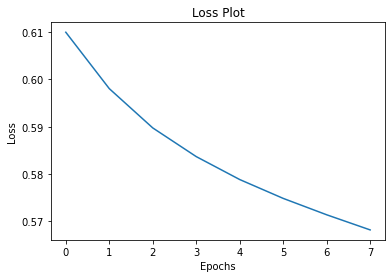

In [41]:
import matplotlib.pyplot as plt
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [106]:
encoder.weights

[<tf.Variable 'cnn__encoder_3/dense_38/kernel:0' shape=(2048, 256) dtype=float32, numpy=
 array([[ 0.07906423, -0.07305035,  0.02868974, ...,  0.01994226,
          0.06199162,  0.03770299],
        [-0.16958316,  0.02862614, -0.01967531, ...,  0.01392494,
         -0.00190343,  0.05438334],
        [-0.08555659, -0.10772238, -0.04963834, ...,  0.11187284,
          0.03932583, -0.01604153],
        ...,
        [-0.07730198,  0.00024443,  0.02351382, ..., -0.03525344,
         -0.073157  , -0.06090371],
        [ 0.05617123,  0.02826956, -0.03355056, ...,  0.04529927,
          0.10224548, -0.17108957],
        [ 0.02586234,  0.01334742, -0.09659585, ..., -0.07062989,
         -0.00835726, -0.05752277]], dtype=float32)>,
 <tf.Variable 'cnn__encoder_3/dense_38/bias:0' shape=(256,) dtype=float32, numpy=
 array([ 0.02842936,  0.04056149, -0.04181682, -0.0103188 , -0.00774593,
        -0.0171052 ,  0.04174636,  0.01815009, -0.01897136,  0.00051018,
        -0.04797055, -0.04309777,  0.015

In [66]:
encoder1 = CNN_Encoder(embedding_dim)
decoder1 = RNN_Decoder(embedding_dim, units, vocab_size)

In [67]:
encoder1.load_weights('encoder')
decoder1.load_weights('decoder')
# encoder1.load_weights(decoder,'./train/ckpt-2')

# Caption

In [4]:
import os
import tensorflow as tf
checkpoint_dir='./latest_checkpoints/'
checkpoint_prefix=os.path.join(checkpoint_dir,'ckpt')


In [7]:
checkpoint=tf.train.Checkpoint(encoder=encoder,
                              decoder=decoder,
                              optimizer=optimizer)

NameError: name 'encoder' is not defined

In [ ]:
# Feel free to change these parameters according to your system's configuration

BATCH_SIZE = 16
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = 7000 + 1
num_steps = len(img_name_train) // BATCH_SIZE
# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 2048
attention_features_shape = 64
max_length,decoder,load_image,image_features_extract_model,encoder,tokenizer

In [42]:
import matplotlib.pyplot as plt
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder1.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0],
                                                 -1,
                                                 img_tensor_val.shape[3]))

    features = encoder1(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder1(dec_input,
                                                         features,
                                                         hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [43]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for i in range(len_result):
        temp_att = np.resize(attention_plot[i], (8, 8))
        grid_size = max(np.ceil(len_result/2), 2)
        ax = fig.add_subplot(grid_size, grid_size, i+1)
        ax.set_title(result[i])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

Real Caption: <start> several ducks walking around a dirt area some have yellow bills <end>
Prediction Caption: several very close up of a strange pair of birds sit down next to each other <end>


/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


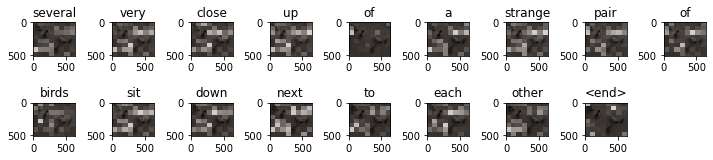

In [73]:
from PIL import Image
# captions on the validation set
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tokenizer.index_word[i]
                        for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

print('Real Caption:', real_caption)
print('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)

In [ ]:
Image.open('')

# Evaluate on own image

In [ ]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [ ]:
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [61]:
#decoder,load_image(),image_features_extract_model,encoder,tokenizer,
def evaluate(image):
    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0],
                                                 -1,
                                                 img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input,
                                                         features,
                                                         hidden)

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result

        dec_input = tf.expand_dims([predicted_id], 0)

    return result

In [64]:
import os
lt=os.listdir('train2014')
' '.join(evaluate('train2014/'+lt[0]))

'a street sign in jeans stands on a city road <end>'